### Step 1: Data Exploration

In [1]:
# Exploring the dataset to understand its structure

import pandas as pd
import numpy as np

# Loading the dataset
df = pd.read_csv('questions.csv')  

# Checking the dataset structure
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())

print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Checking the distribution of duplicate vs non-duplicate questions
if 'is_duplicate' in df.columns:
    print("\nDuplicate Distribution:")
    print(df['is_duplicate'].value_counts())
    print("Percentage of duplicates:", (df['is_duplicate'].sum() / len(df)) * 100, "%")

# displaying some example question pairs
print("\n--- Example Question Pairs ---")
for i in range(3):
    print(f"\nPair {i+1}:")
    print(f"Question 1: {df.iloc[i]['question1']}")
    print(f"Question 2: {df.iloc[i]['question2']}")
    if 'is_duplicate' in df.columns:
        print(f"Is Duplicate: {df.iloc[i]['is_duplicate']}")
    print("-" * 50)

Dataset Shape: (404351, 6)

Column Names:
['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate']

First 5 rows:
   id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0  

Dataset Info:
<class 'pandas.c

### Step 2: Data Preparation and Cleaning:

In [2]:
import pandas as pd
import numpy as np

# Loading the dataset
df = pd.read_csv('questions.csv')  

print("=== FAST DATA PREPARATION ===")

# Step 2.1: Basic Cleaning
print("1. Cleaning the data...")
df_clean = df.dropna(subset=['question1', 'question2'])
print(f"Removed {len(df) - len(df_clean)} rows with missing questions")

# Converting to string
df_clean['question1'] = df_clean['question1'].astype(str)
df_clean['question2'] = df_clean['question2'].astype(str)

# Step 2.2: Extracting unique questions using pandas
print("\n2. Extracting unique questions (FAST method)...")

# Combining both question columns into one series
all_questions_series = pd.concat([
    df_clean['question1'], 
    df_clean['question2']
], ignore_index=True)

# Getting unique questions 
unique_questions = all_questions_series.drop_duplicates().reset_index(drop=True)

print(f"Total unique questions found: {len(unique_questions)}")

# Step 2.3: Createing questions database
print("\n3. Creating questions database...")
questions_db = pd.DataFrame({
    'question_id': range(len(unique_questions)),
    'question_text': unique_questions
})

# Adding metadata
questions_db['question_length'] = questions_db['question_text'].str.len()
questions_db['word_count'] = questions_db['question_text'].str.split().str.len()

print(f"Database shape: {questions_db.shape}")
print("\nSample questions:")
print(questions_db.head(10))

# Step 2.4: Saving files
print("\n4. Saving files...")
questions_db.to_csv('unique_questions.csv', index=False)
print("Saved unique questions to 'unique_questions.csv'")

# Creating a smaller sample for testing
sample_size = 1000
questions_sample = questions_db.head(sample_size).copy()
questions_sample.to_csv('questions_sample.csv', index=False)
print(f"Created sample dataset with {sample_size} questions")

# Step 2.5: Statistics
print(f"\n=== DATASET STATISTICS ===")
print(f"Original dataset: {len(df):,} question pairs")
print(f"After cleaning: {len(df_clean):,} question pairs") 
print(f"Unique questions: {len(unique_questions):,}")
print(f"Average question length: {questions_db['question_length'].mean():.1f} characters")
print(f"Average word count: {questions_db['word_count'].mean():.1f} words")
print(f"Shortest question: {questions_db['question_length'].min()} characters")
print(f"Longest question: {questions_db['question_length'].max()} characters")

# Showing examples
print(f"\n=== EXAMPLE QUESTIONS ===")
try:
    short_q = questions_db[questions_db['question_length'] < 30].iloc[0]
    print(f"Short: {short_q['question_text']}")
except:
    print("Short: No questions under 30 characters")

try:
    medium_q = questions_db[(questions_db['question_length'] >= 50) & 
                           (questions_db['question_length'] <= 100)].iloc[0]
    print(f"Medium: {medium_q['question_text']}")
except:
    print("Medium: No questions in 50-100 character range")

try:
    long_q = questions_db[questions_db['question_length'] > 150].iloc[0]
    print(f"Long: {long_q['question_text']}")
except:
    print("Long: No questions over 150 characters")

print("Data cleaned and prepared")
print("Unique questions database created") 
print("Files saved successfully")

=== FAST DATA PREPARATION ===
1. Cleaning the data...
Removed 3 rows with missing questions


C:\Users\hadia\AppData\Local\Temp\ipykernel_2928\2546153254.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['question1'] = df_clean['question1'].astype(str)
C:\Users\hadia\AppData\Local\Temp\ipykernel_2928\2546153254.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['question2'] = df_clean['question2'].astype(str)



2. Extracting unique questions (FAST method)...
Total unique questions found: 537386

3. Creating questions database...
Database shape: (537386, 4)

Sample questions:
   question_id                                      question_text  \
0            0  What is the step by step guide to invest in sh...   
1            1  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2            2  How can I increase the speed of my internet co...   
3            3  Why am I mentally very lonely? How can I solve...   
4            4  Which one dissolve in water quikly sugar, salt...   
5            5  Astrology: I am a Capricorn Sun Cap moon and c...   
6            6                                Should I buy tiago?   
7            7                     How can I be a good geologist?   
8            8                    When do you use シ instead of し?   
9            9  Motorola (company): Can I hack my Charter Moto...   

   question_length  word_count  
0               66          14  
1     

### Step 3: SBERT Embeddings Generation

In [ ]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
import pickle
import time
from tqdm import tqdm

print("=== SBERT EMBEDDINGS GENERATION ===")

# Step 4.1: Load the pre-trained SBERT model
print("1. Loading SBERT model...")
# Using a model optimized for semantic similarity
model = SentenceTransformer('all-MiniLM-L6-v2')  # Fast and good quality
# Alternative models you can try:
# model = SentenceTransformer('all-mpnet-base-v2')  # Higher quality, slower
# model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')  # Multilingual

print(f"Model loaded: {model}")

# Step 4.2: Load your prepared questions
print("\n2. Loading questions...")
questions_df = pd.read_csv('unique_questions.csv')
print(f"Loaded {len(questions_df):,} unique questions")

# For testing, let's start with a smaller batch
BATCH_SIZE = 10000  # Process 10k questions first for testing
questions_sample = questions_df.head(BATCH_SIZE).copy()

questions_list = questions_sample['question_text'].tolist()
print(f"Processing {len(questions_list):,} questions")

# Step 4.3: Generate embeddings with progress tracking
print("\n3. Generating SBERT embeddings...")
start_time = time.time()

# Generate embeddings in batches to avoid memory issues
batch_size = 500  # Process 500 questions at a time
embeddings_list = []

for i in tqdm(range(0, len(questions_list), batch_size), desc="Generating embeddings"):
    batch = questions_list[i:i+batch_size]
    batch_embeddings = model.encode(batch, 
                                   convert_to_tensor=False,
                                   show_progress_bar=False)
    embeddings_list.extend(batch_embeddings)

# Convert to numpy array
embeddings = np.array(embeddings_list)
end_time = time.time()

print(f"Generated embeddings in {end_time - start_time:.2f} seconds")
print(f"Embeddings shape: {embeddings.shape}")
print(f"Each question represented as {embeddings.shape[1]}-dimensional vector")

# Step 4.4: Save embeddings and metadata
print("\n4. Saving embeddings and metadata...")

# Save embeddings
np.save('question_embeddings.npy', embeddings)
print("Saved embeddings to 'question_embeddings.npy'")

# Save metadata
embeddings_metadata = {
    'model_name': 'all-MiniLM-L6-v2',
    'embedding_dim': embeddings.shape[1],
    'num_questions': embeddings.shape[0],
    'generation_time': end_time - start_time,
    'batch_size': BATCH_SIZE
}

with open('embeddings_metadata.pkl', 'wb') as f:
    pickle.dump(embeddings_metadata, f)
print("Saved metadata to 'embeddings_metadata.pkl'")

# Save the questions with IDs for reference
questions_sample.to_csv('processed_questions.csv', index=False)
print("Saved processed questions to 'processed_questions.csv'")

# Step 4.5: Quick quality check
print("\n5. Quality check...")
print(f"Sample embedding (first 10 dimensions): {embeddings[0][:10]}")
print(f"Embedding statistics:")
print(f"  - Mean: {embeddings.mean():.4f}")
print(f"  - Std: {embeddings.std():.4f}")
print(f"  - Min: {embeddings.min():.4f}")
print(f"  - Max: {embeddings.max():.4f}")

print("\n=== EMBEDDINGS GENERATION COMPLETE ===")

=== SBERT EMBEDDINGS GENERATION ===
1. Loading SBERT model...
Model loaded: SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

2. Loading questions...
Loaded 537,386 unique questions
Processing 10,000 questions

3. Generating SBERT embeddings...


Generating embeddings:   5%|▌         | 1/20 [00:05<01:40,  5.28s/it]

### Step 4:  Implement Cosine Similarity Search 

In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import pickle
import time

class QuestionSimilarityFinder:
    def __init__(self):
        self.embeddings = None
        self.questions_df = None
        self.model = None
        self.metadata = None
        
    def load_data(self):
        """Load all necessary data and models"""
        print("=== LOADING SIMILARITY SEARCH SYSTEM ===")
        
        # Load embeddings
        print("1. Loading embeddings...")
        self.embeddings = np.load('question_embeddings.npy')
        print(f"✓ Loaded embeddings: {self.embeddings.shape}")
        
        # Load questions
        print("2. Loading questions...")
        self.questions_df = pd.read_csv('processed_questions.csv')
        print(f"✓ Loaded {len(self.questions_df):,} questions")
        
        # Load model for encoding new questions
        print("3. Loading SBERT model...")
        self.model = SentenceTransformer('all-MiniLM-L6-v2')
        print("✓ Model loaded")
        
        # Load metadata
        with open('embeddings_metadata.pkl', 'rb') as f:
            self.metadata = pickle.load(f)
        print("✓ Metadata loaded")
        
        print("✓ System ready for similarity search!")
        
    def find_similar_questions(self, query_question, top_k=5, similarity_threshold=0.5):
        """
        Find the most similar questions to a given query
        
        Args:
            query_question (str): The question to find similarities for
            top_k (int): Number of top similar questions to return
            similarity_threshold (float): Minimum similarity score to consider
            
        Returns:
            list: List of similar questions with their similarity scores
        """
        print(f"\n=== FINDING SIMILAR QUESTIONS ===")
        print(f"Query: '{query_question}'")
        
        # Encode the query question
        start_time = time.time()
        query_embedding = self.model.encode([query_question])
        
        # Calculate cosine similarity with all questions
        similarities = cosine_similarity(query_embedding, self.embeddings)[0]
        
        # Get top-k similar questions
        top_indices = np.argsort(similarities)[::-1][:top_k]
        
        end_time = time.time()
        
        results = []
        for i, idx in enumerate(top_indices):
            similarity_score = similarities[idx]
            if similarity_score >= similarity_threshold:
                question_data = self.questions_df.iloc[idx]
                results.append({
                    'rank': i + 1,
                    'question_id': question_data['question_id'],
                    'question_text': question_data['question_text'],
                    'similarity_score': similarity_score,
                    'question_length': question_data['question_length'],
                    'word_count': question_data['word_count']
                })
        
        print(f"✓ Search completed in {end_time - start_time:.4f} seconds")
        print(f"✓ Found {len(results)} similar questions above threshold ({similarity_threshold})")
        
        return results
    
    def display_results(self, results):
        """Display search results in a formatted way"""
        if not results:
            print("No similar questions found above the threshold.")
            return
            
        print("\n" + "="*80)
        print("SIMILAR QUESTIONS FOUND:")
        print("="*80)
        
        for result in results:
            print(f"\nRank {result['rank']} | Similarity: {result['similarity_score']:.4f}")
            print(f"Question: {result['question_text']}")
            #print(f"Stats: {result['word_count']} words, {result['question_length']} characters")
            print("-" * 60)
    

# Usage example
def main():
    # Initialize the similarity finder
    finder = QuestionSimilarityFinder()
    finder.load_data()
    
    # Example searches
    test_questions = [
        "How can I make money online?",
        "What is machine learning?",
        "How to learn Python programming?",
        "What are the best ways to invest money?",
        "How can I lose weight fast?"
    ]
    
    print("\n" + "="*100)
    print("TESTING SIMILARITY SEARCH")
    print("="*100)
    
    for query in test_questions:
        results = finder.find_similar_questions(
            query_question=query,
            top_k=5,
            similarity_threshold=0.8  
        )
        finder.display_results(results)
        print("\n" + "="*100)
    
    return finder

# Interactive search function
def interactive_search():
    """Interactive search where user can input questions"""
    finder = QuestionSimilarityFinder()
    finder.load_data()
    
    print("\nINTERACTIVE QUESTION SIMILARITY SEARCH")
    print("Type your questions to find similar ones!")
    print("Type 'quit' to exit\n")
    
    while True:
        query = input("Enter your question: ").strip()
        
        if query.lower() in ['quit', 'exit', 'q']:
            print("Goodbye!")
            break
            
        if not query:
            print("Please enter a valid question.")
            continue
            
        try:
            results = finder.find_similar_questions(
                query_question=query,
                top_k=5,
                similarity_threshold=0.7
            )
            finder.display_results(results)
        except Exception as e:
            print(f"Error: {str(e)}")
        
        print("\n" + "-"*80 + "\n")

if __name__ == "__main__":
    # Run the main example
    finder = main()
    
    #interactive_search()

=== LOADING SIMILARITY SEARCH SYSTEM ===
1. Loading embeddings...
✓ Loaded embeddings: (20000, 384)
2. Loading questions...
✓ Loaded 20,000 questions
3. Loading SBERT model...
✓ Model loaded
✓ Metadata loaded
✓ System ready for similarity search!

TESTING SIMILARITY SEARCH

=== FINDING SIMILAR QUESTIONS ===
Query: 'How can I make money online?'
✓ Search completed in 0.1271 seconds
✓ Found 5 similar questions above threshold (0.8)

SIMILAR QUESTIONS FOUND:

Rank 1 | Similarity: 0.9851
Question: How can one make money online?
------------------------------------------------------------

Rank 2 | Similarity: 0.9653
Question: How do you make money online?
------------------------------------------------------------

Rank 3 | Similarity: 0.9636
Question: What is a way to make money online?
------------------------------------------------------------

Rank 4 | Similarity: 0.9623
Question: What are ways I can make money online?
------------------------------------------------------------

Ran

### Batch Similarity Check

In [ ]:
# Initialize the finder
finder = QuestionSimilarityFinder()
finder.load_data()


def batch_similarity_check(self, question_pairs):
        """
        Check similarity for multiple question pairs
        Useful for evaluation on the original Quora dataset
        """
        print(f"\n=== BATCH SIMILARITY CHECK ===")
        results = []
        
        for i, (q1, q2) in enumerate(question_pairs):
            # Encode both questions
            embeddings = self.model.encode([q1, q2])
            
            # Calculate similarity
            similarity = cosine_similarity([embeddings[0]], [embeddings[1]])[0][0]
            
            results.append({
                'pair_id': i,
                'question1': q1,
                'question2': q2,
                'similarity_score': similarity
            })
            
            if i % 100 == 0:
                print(f"Processed {i} pairs...")
        
        return results
    
df = pd.read_csv('questions.csv')
dataset_pairs = list(zip(df['question1'].head(100), df['question2'].head(100)))
results = finder.batch_similarity_check(dataset_pairs)

# Display results in a readable format
print("\nRESULTS:")
print("=" * 80)
for r in results:
    print(f"\nPair {r['pair_id']}:")
    print(f"Question 1: {r['question1']}")
    print(f"Question 2: {r['question2']}")
    print(f"Similarity Score: {r['similarity_score']:.4f}")
    print("-" * 60)


### Step 5: Evaluation System

STARTING COMPLETE EVALUATION
=== LOADING EVALUATION DATA ===
✓ Loaded 1000 question pairs for evaluation
✓ Duplicate pairs: 366
✓ Non-duplicate pairs: 634

=== GENERATING PREDICTIONS ===
Processing 1000 question pairs...
Processed 100 pairs...
Processed 600 pairs...
✓ Predictions completed in 24.29 seconds

=== FINDING OPTIMAL THRESHOLD ===
✓ Optimal threshold: 0.700
✓ Best F1-score: 0.7402

=== PERFORMANCE EVALUATION ===
Similarity threshold: 0.7000000000000002

PERFORMANCE METRICS:
Accuracy:  0.7550 (75.50%)
Precision: 0.6049 (60.49%)
Recall:    0.9536 (95.36%)
F1-Score:  0.7402 (74.02%)
AUC Score: 0.8723 (87.23%)

CONFUSION MATRIX BREAKDOWN:
True Positives:   349
True Negatives:   406
False Positives:  228
False Negatives:   17

=== EXAMPLE ANALYSIS ===

CORRECT PREDICTIONS (High Confidence):

Similarity: 0.8904 | Predicted: 1 | Actual: 1
Q1: How can rock music be brought back?
Q2: What would it take for rock music to make a come back?
-----------------------------------------------

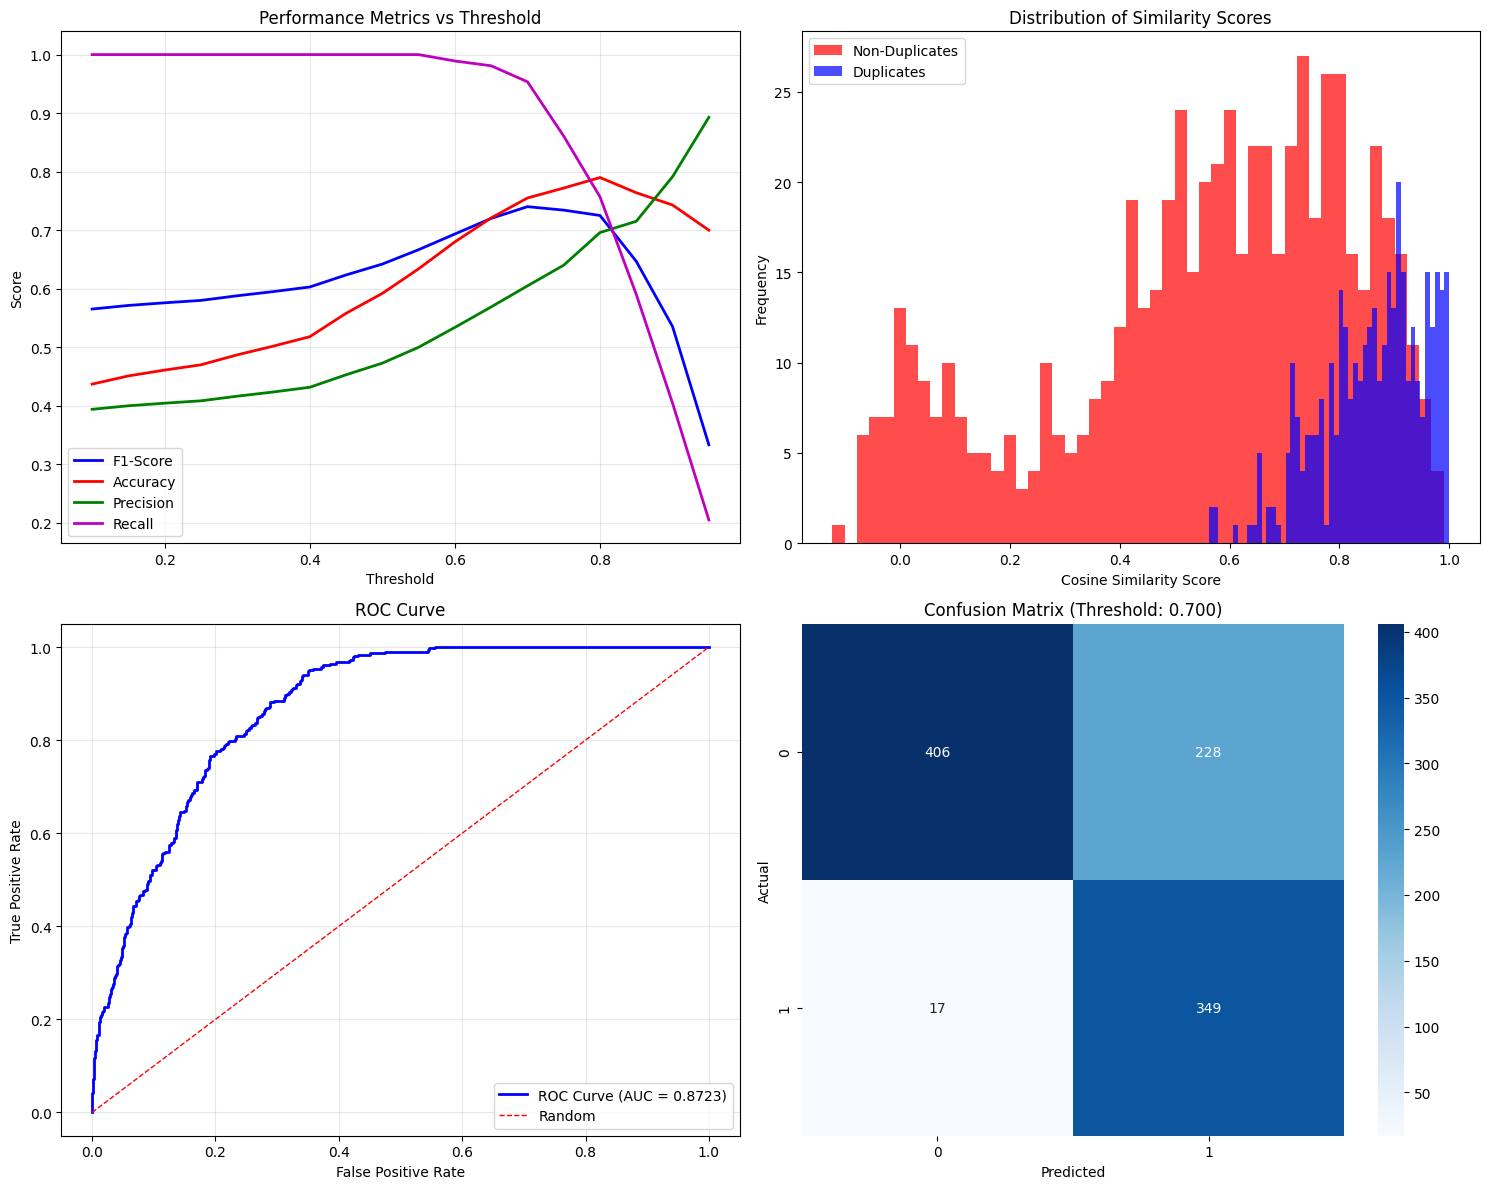

✓ Visualizations saved as 'evaluation_results.png'

EVALUATION COMPLETE!
✓ Results saved to CSV files
✓ Visualizations saved as PNG


In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import time

class QuestionSimilarityEvaluator:
    def __init__(self):
        self.model = SentenceTransformer('all-MiniLM-L6-v2')
        self.results = {}
        
    def load_test_data(self, sample_size=1000):
        """Load and prepare test data from original Quora dataset"""
        print("=== LOADING EVALUATION DATA ===")
        
        # Load the original dataset with labels
        df = pd.read_csv('questions.csv')
        df_clean = df.dropna(subset=['question1', 'question2', 'is_duplicate'])
        
        # Take a random sample for evaluation
        test_data = df_clean.sample(n=sample_size, random_state=42)
        
        print(f"✓ Loaded {len(test_data)} question pairs for evaluation")
        print(f"✓ Duplicate pairs: {test_data['is_duplicate'].sum()}")
        print(f"✓ Non-duplicate pairs: {len(test_data) - test_data['is_duplicate'].sum()}")
        
        return test_data
    
    def predict_similarity(self, question_pairs, threshold=0.5):
        """
        Predict similarity for question pairs using SBERT + Cosine Similarity
        
        Args:
            question_pairs: DataFrame with 'question1' and 'question2' columns
            threshold: Similarity threshold for classification
            
        Returns:
            predictions, similarity_scores
        """
        print(f"\n=== GENERATING PREDICTIONS ===")
        print(f"Processing {len(question_pairs)} question pairs...")
        
        similarities = []
        predictions = []
        
        start_time = time.time()
        
        # Process in batches for efficiency
        batch_size = 100
        for i in range(0, len(question_pairs), batch_size):
            batch = question_pairs.iloc[i:i+batch_size]
            
            # Get embeddings for both questions in batch
            q1_embeddings = self.model.encode(batch['question1'].tolist())
            q2_embeddings = self.model.encode(batch['question2'].tolist())
            
            # Calculate cosine similarities
            for j in range(len(batch)):
                similarity = cosine_similarity([q1_embeddings[j]], [q2_embeddings[j]])[0][0]
                similarities.append(similarity)
                predictions.append(1 if similarity >= threshold else 0)
            
            if i % 500 == 0:
                print(f"Processed {i + len(batch)} pairs...")
        
        end_time = time.time()
        print(f"✓ Predictions completed in {end_time - start_time:.2f} seconds")
        
        return np.array(predictions), np.array(similarities)
    
    def evaluate_performance(self, y_true, y_pred, similarities, threshold=0.5):
        """Comprehensive performance evaluation"""
        print(f"\n=== PERFORMANCE EVALUATION ===")
        print(f"Similarity threshold: {threshold}")
        
        # Basic metrics
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        
        # AUC score
        auc_score = roc_auc_score(y_true, similarities)
        
        results = {
            'threshold': threshold,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'auc_score': auc_score,
            'total_samples': len(y_true),
            'true_positives': np.sum((y_true == 1) & (y_pred == 1)),
            'true_negatives': np.sum((y_true == 0) & (y_pred == 0)),
            'false_positives': np.sum((y_true == 0) & (y_pred == 1)),
            'false_negatives': np.sum((y_true == 1) & (y_pred == 0))
        }
        
        # Print results
        print(f"\nPERFORMANCE METRICS:")
        print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
        print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
        print(f"Recall:    {recall:.4f} ({recall*100:.2f}%)")
        print(f"F1-Score:  {f1:.4f} ({f1*100:.2f}%)")
        print(f"AUC Score: {auc_score:.4f} ({auc_score*100:.2f}%)")
        
        print(f"\nCONFUSION MATRIX BREAKDOWN:")
        print(f"True Positives:  {results['true_positives']:4d}")
        print(f"True Negatives:  {results['true_negatives']:4d}")
        print(f"False Positives: {results['false_positives']:4d}")
        print(f"False Negatives: {results['false_negatives']:4d}")
        
        return results
    
    def find_optimal_threshold(self, y_true, similarities):
        """Find the best threshold for classification"""
        print(f"\n=== FINDING OPTIMAL THRESHOLD ===")
        
        thresholds = np.arange(0.1, 1.0, 0.05)
        best_f1 = 0
        best_threshold = 0.5
        threshold_results = []
        
        for threshold in thresholds:
            y_pred = (similarities >= threshold).astype(int)
            f1 = f1_score(y_true, y_pred)
            
            threshold_results.append({
                'threshold': threshold,
                'f1_score': f1,
                'accuracy': accuracy_score(y_true, y_pred),
                'precision': precision_score(y_true, y_pred, zero_division=0),
                'recall': recall_score(y_true, y_pred, zero_division=0)
            })
            
            if f1 > best_f1:
                best_f1 = f1
                best_threshold = threshold
        
        print(f"✓ Optimal threshold: {best_threshold:.3f}")
        print(f"✓ Best F1-score: {best_f1:.4f}")
        
        return best_threshold, threshold_results
    
    def analyze_examples(self, test_data, similarities, predictions, n_examples=5):
        """Analyze specific examples of predictions"""
        print(f"\n=== EXAMPLE ANALYSIS ===")
        
        # Add predictions to test data
        test_data_copy = test_data.copy()
        test_data_copy['similarity_score'] = similarities
        test_data_copy['predicted'] = predictions
        test_data_copy['correct'] = (test_data_copy['is_duplicate'] == test_data_copy['predicted'])
        
        print(f"\nCORRECT PREDICTIONS (High Confidence):")
        correct_high_conf = test_data_copy[
            test_data_copy['correct'] & 
            ((test_data_copy['similarity_score'] > 0.8) | (test_data_copy['similarity_score'] < 0.2))
        ].head(n_examples)
        
        for idx, row in correct_high_conf.iterrows():
            print(f"\nSimilarity: {row['similarity_score']:.4f} | Predicted: {row['predicted']} | Actual: {row['is_duplicate']}")
            print(f"Q1: {row['question1']}")
            print(f"Q2: {row['question2']}")
            print("-" * 60)
        
        print(f"\n INCORRECT PREDICTIONS:")
        incorrect = test_data_copy[~test_data_copy['correct']].head(n_examples)
        
        for idx, row in incorrect.iterrows():
            print(f"\nSimilarity: {row['similarity_score']:.4f} | Predicted: {row['predicted']} | Actual: {row['is_duplicate']}")
            print(f"Q1: {row['question1']}")
            print(f"Q2: {row['question2']}")
            print("-" * 60)
        
        return test_data_copy
    
    def create_visualizations(self, threshold_results, similarities, y_true):
        """Create performance visualizations"""
        print(f"\n=== CREATING VISUALIZATIONS ===")
        
        # Create subplots
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # 1. Threshold vs Metrics
        df_thresh = pd.DataFrame(threshold_results)
        
        axes[0,0].plot(df_thresh['threshold'], df_thresh['f1_score'], 'b-', label='F1-Score', linewidth=2)
        axes[0,0].plot(df_thresh['threshold'], df_thresh['accuracy'], 'r-', label='Accuracy', linewidth=2)
        axes[0,0].plot(df_thresh['threshold'], df_thresh['precision'], 'g-', label='Precision', linewidth=2)
        axes[0,0].plot(df_thresh['threshold'], df_thresh['recall'], 'm-', label='Recall', linewidth=2)
        axes[0,0].set_xlabel('Threshold')
        axes[0,0].set_ylabel('Score')
        axes[0,0].set_title('Performance Metrics vs Threshold')
        axes[0,0].legend()
        axes[0,0].grid(True, alpha=0.3)
        
        # 2. Similarity Score Distribution
        axes[0,1].hist(similarities[y_true == 0], bins=50, alpha=0.7, label='Non-Duplicates', color='red')
        axes[0,1].hist(similarities[y_true == 1], bins=50, alpha=0.7, label='Duplicates', color='blue')
        axes[0,1].set_xlabel('Cosine Similarity Score')
        axes[0,1].set_ylabel('Frequency')
        axes[0,1].set_title('Distribution of Similarity Scores')
        axes[0,1].legend()
        
        # 3. ROC Curve
        fpr, tpr, _ = roc_curve(y_true, similarities)
        auc_score = roc_auc_score(y_true, similarities)
        
        axes[1,0].plot(fpr, tpr, color='blue', linewidth=2, label=f'ROC Curve (AUC = {auc_score:.4f})')
        axes[1,0].plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=1, label='Random')
        axes[1,0].set_xlabel('False Positive Rate')
        axes[1,0].set_ylabel('True Positive Rate')
        axes[1,0].set_title('ROC Curve')
        axes[1,0].legend()
        axes[1,0].grid(True, alpha=0.3)
        
        # 4. Confusion Matrix
        best_threshold = df_thresh.loc[df_thresh['f1_score'].idxmax(), 'threshold']
        y_pred_best = (similarities >= best_threshold).astype(int)
        cm = confusion_matrix(y_true, y_pred_best)
        
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1,1])
        axes[1,1].set_xlabel('Predicted')
        axes[1,1].set_ylabel('Actual')
        axes[1,1].set_title(f'Confusion Matrix (Threshold: {best_threshold:.3f})')
        
        plt.tight_layout()
        plt.savefig('evaluation_results.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("✓ Visualizations saved as 'evaluation_results.png'")

def run_complete_evaluation():
    """Run the complete evaluation pipeline"""
    print("STARTING COMPLETE EVALUATION")
    print("="*80)
    
    evaluator = QuestionSimilarityEvaluator()
    
    # Load test data
    test_data = evaluator.load_test_data(sample_size=1000)  # Adjust sample size as needed
    
    # Generate predictions
    y_true = test_data['is_duplicate'].values
    y_pred, similarities = evaluator.predict_similarity(test_data)
    
    # Find optimal threshold
    best_threshold, threshold_results = evaluator.find_optimal_threshold(y_true, similarities)
    
    # Evaluate with optimal threshold
    y_pred_optimal = (similarities >= best_threshold).astype(int)
    results = evaluator.evaluate_performance(y_true, y_pred_optimal, similarities, best_threshold)
    
    # Analyze examples
    analysis_data = evaluator.analyze_examples(test_data, similarities, y_pred_optimal)
    
    # Create visualizations
    evaluator.create_visualizations(threshold_results, similarities, y_true)
    
    # Save detailed results
    results_df = pd.DataFrame(threshold_results)
    results_df.to_csv('threshold_analysis.csv', index=False)
    
    analysis_data.to_csv('prediction_analysis.csv', index=False)
    
    print(f"\nEVALUATION COMPLETE!")
    print(f"✓ Results saved to CSV files")
    print(f"✓ Visualizations saved as PNG")
    
    return results, evaluator

if __name__ == "__main__":
    results, evaluator = run_complete_evaluation()